In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df = pd.read_csv('/home/leem/repos/wind-energy-prediction/Dateset#1/Dataset1_forecast.csv')
df2 = pd.read_csv('/home/leem/repos/wind-energy-prediction/Dateset#1/Dataset1_measurement.csv')

In [75]:
trimmed_df = df[:7339]
def format_datetime(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d %H:%M')
    return date.strftime('%Y-%m-%d %H:%M')
    
trimmed_df['forecast_time'] = trimmed_df['Time'].apply(format_datetime)
trimmed_df.rename(columns = {'windSpeed (m/s)':'forecast_windspeed', 'windDic (degree)':'forecast_windDic'}, inplace = True) 


def format_measured_datetime(date_string):
    date = datetime.strptime(date_string, '%Y-%m-%d %H:%M')
    return date.strftime('%Y-%m-%d %H:00')

df2['forecast_time'] = df2['timeStamp'].apply(format_measured_datetime)
combined_df = pd.merge(df2,trimmed_df, on =['forecast_time'])
combined_df.replace('\\N','-1', inplace=True)
combined_df = combined_df.astype({'availableMW': float, 'windSpeed': float, 'windPower': float, 'forecast_windspeed':float, 'forecast_windDic':float } )
combined_df.drop(['Time'], axis=1)

/home/leem/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,timeStamp,availableMW,windSpeed,windPower,forecast_time,forecast_windspeed,forecast_windDic
0,2018-01-01 0:00,34.5,11.9,42.5118,2018-01-01 00:00,9.502410,303.854000
1,2018-01-01 0:05,34.5,12.0,42.7067,2018-01-01 00:00,9.502410,303.854000
2,2018-01-01 0:10,34.5,12.0,42.7067,2018-01-01 00:00,9.502410,303.854000
3,2018-01-01 0:15,34.5,11.8,42.3044,2018-01-01 00:00,9.502410,303.854000
4,2018-01-01 0:20,34.5,11.8,42.3044,2018-01-01 00:00,9.502410,303.854000
...,...,...,...,...,...,...,...
79444,2018-12-30 23:35,11.9,3.3,0.0000,2018-12-30 23:00,2.871574,166.134875
79445,2018-12-30 23:40,10.5,3.3,0.0000,2018-12-30 23:00,2.871574,166.134875
79446,2018-12-30 23:45,5.2,3.1,0.0000,2018-12-30 23:00,2.871574,166.134875
79447,2018-12-30 23:50,6.0,3.1,0.0000,2018-12-30 23:00,2.871574,166.134875


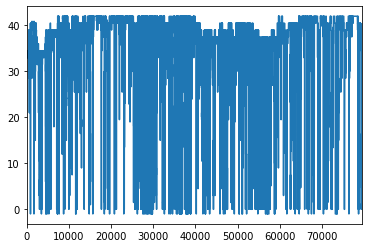

In [69]:
combined_df['availableMW'].plot()

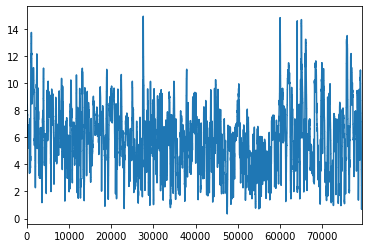

In [72]:
combined_df['forecast_windspeed'].plot()

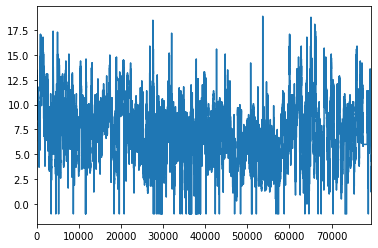

In [78]:
combined_df['windSpeed'].plot()

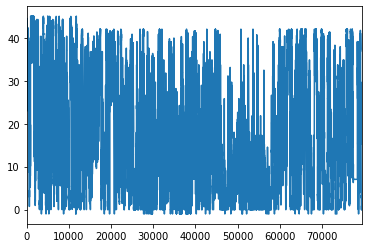

In [79]:
combined_df['windPower'].plot()

In [5]:
def check_times_match(measured_timestamp, forecast_time):
    measured_datetime = datetime.strptime(measured_timestamp, '%Y-%m-%d %H:%M')
    forecast_datetime = datetime.strptime(forecast_time, '%Y-%m-%d %H:%M')
    return measured_datetime.date() == forecast_datetime.date() and measured_datetime.hour == forecast_datetime.hour

In [30]:
measured = df2['timeStamp'][2]
forecast = df['Time'][0]
forecast_datetime = datetime.strptime(forecast, '%Y-%m-%d %H:%M')
measured_datetime = datetime.strptime(measured, '%Y-%m-%d %H:%M')


In [31]:
measured_datetime

datetime.datetime(2018, 1, 1, 0, 10)

In [37]:
forecast_datetime.strftime('%Y-%m-%d %H:%M') 

'2018-01-01 00:00'

In [34]:
measured_datetime.strftime('%Y-%m-%d %H:00')

'2018-01-01 00:00'

In [9]:
forecast

'2018-01-01 0:00'